### Importación de datos



In [3]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


In [4]:
# Analisis exploratorio
print(tienda.shape)
print(tienda2.shape)
print(tienda3.shape)
print(tienda4.shape)

(2359, 12)
(2359, 12)
(2359, 12)
(2358, 12)


In [5]:
print(tienda.info())
print(tienda2.info())
print(tienda3.info())
print(tienda4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data col

In [6]:
print(tienda.isnull().sum())
print(tienda2.isnull().sum())
print(tienda3.isnull().sum())
print(tienda4.isnull().sum())

Producto                  0
Categoría del Producto    0
Precio                    0
Costo de envío            0
Fecha de Compra           0
Vendedor                  0
Lugar de Compra           0
Calificación              0
Método de pago            0
Cantidad de cuotas        0
lat                       0
lon                       0
dtype: int64
Producto                  0
Categoría del Producto    0
Precio                    0
Costo de envío            0
Fecha de Compra           0
Vendedor                  0
Lugar de Compra           0
Calificación              0
Método de pago            0
Cantidad de cuotas        0
lat                       0
lon                       0
dtype: int64
Producto                  0
Categoría del Producto    0
Precio                    0
Costo de envío            0
Fecha de Compra           0
Vendedor                  0
Lugar de Compra           0
Calificación              0
Método de pago            0
Cantidad de cuotas        0
lat                   

In [7]:
#corregir tipo de dato
conversiones = {
    "Precio": int,
    "Costo de envío": int,
    "Fecha de Compra" : "datetime"
}

def corregir_tipos(df, conversiones):
    for columna, tipo in conversiones.items():
        if columna in df.columns:
            if tipo == "datetime":
                df[columna] = pd.to_datetime(df[columna], format="%d/%m/%Y")
            else:
                df[columna] = df[columna].astype(tipo)
    return df


tiendas = [tienda, tienda2, tienda3, tienda4]
tiendas_corregidas = [corregir_tipos(df, conversiones) for df in tiendas]

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300,6900,2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300,8400,2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600,15900,2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500,41000,2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200,20200,2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [8]:
# suma de ventas por tienda
ventas_tienda1 = tienda["Precio"].sum()
ventas_tienda2 = tienda2["Precio"].sum()
ventas_tienda3 = tienda3["Precio"].sum()
ventas_tienda4 = tienda4["Precio"].sum()


ingresos = {
    "Tienda 1": ventas_tienda1,
    "Tienda 2": ventas_tienda2,
    "Tienda 3": ventas_tienda3,
    "Tienda 4": ventas_tienda4
}

for tien, ingre in ingresos.items():
    print(f"{tien}: ${ingre:,.2f}")

Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


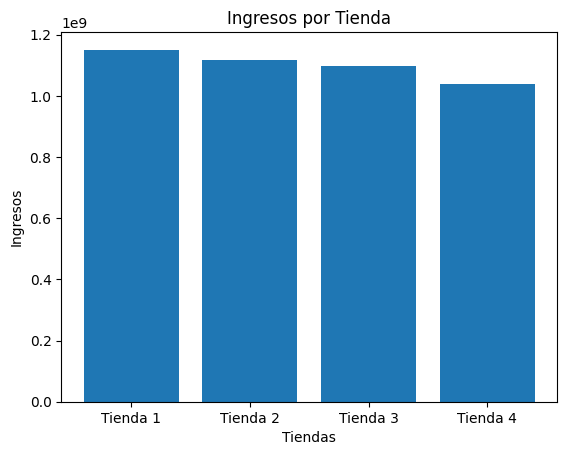

In [9]:
#grafica de ventas por tienda
tiendas = list(ingresos.keys())
ingresos = list(ingresos.values())

plt.bar(tiendas, ingresos)
plt.xlabel("Tiendas")
plt.ylabel("Ingresos")
plt.title("Ingresos por Tienda")
plt.show()

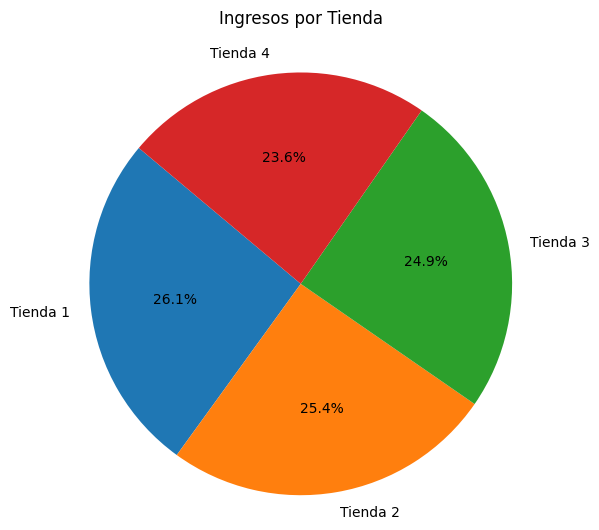

In [11]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(ingresos, labels=tiendas, autopct='%1.1f%%', startangle=140)
plt.title("Ingresos por Tienda\n")
plt.axis("equal")
plt.show()

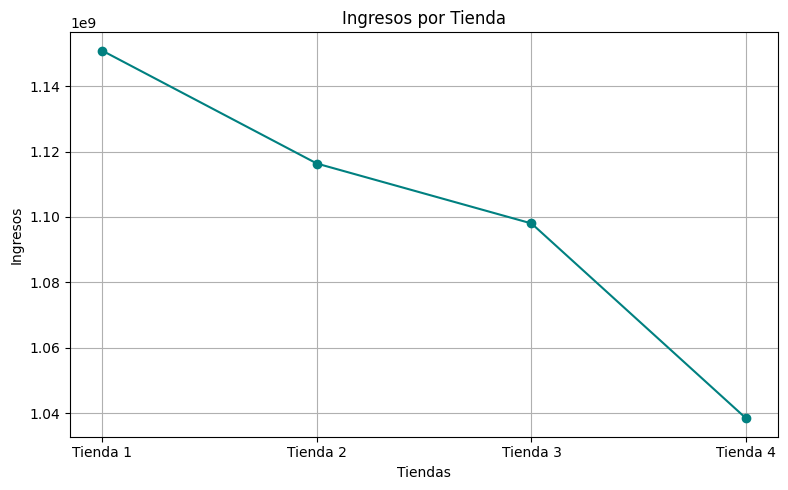

In [12]:
# Line plot
plt.figure(figsize=(8, 5))
plt.plot(tiendas, ingresos, marker='o', linestyle='-', color='teal')
plt.title("Ingresos por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Ingresos")
plt.grid(True)
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [13]:
# Agrupar y suma de total de categorias
#Tienda1
categorias_tienda1 = tienda["Categoría del Producto"].value_counts().reset_index()
categorias_tienda1.columns = ["Categoría del Producto", "Cantidad"]
# Tienda 2
categorias_tienda2 = tienda2["Categoría del Producto"].value_counts().reset_index()
categorias_tienda2.columns = ["Categoría del Producto", "Cantidad"]
# Tienda 3
categorias_tienda3 = tienda3["Categoría del Producto"].value_counts().reset_index()
categorias_tienda3.columns = ["Categoría del Producto", "Cantidad"]
# Tienda 4
categorias_tienda4 = tienda4["Categoría del Producto"].value_counts().reset_index()
categorias_tienda4.columns = ["Categoría del Producto", "Cantidad"]

print("Ventas tienda 1 por Categoría\n",categorias_tienda1, "\n")
print("Ventas tienda 2 por Categoría\n",categorias_tienda2, "\n")
print("Ventas tienda 3 por Categoría\n",categorias_tienda3, "\n")
print("Ventas tienda 4 por Categoría\n",categorias_tienda4, "\n")

Ventas tienda 1 por Categoría
     Categoría del Producto  Cantidad
0                  Muebles       465
1             Electrónicos       448
2                 Juguetes       324
3        Electrodomésticos       312
4     Deportes y diversión       284
5   Instrumentos musicales       182
6                   Libros       173
7  Artículos para el hogar       171 

Ventas tienda 2 por Categoría
     Categoría del Producto  Cantidad
0                  Muebles       442
1             Electrónicos       422
2                 Juguetes       313
3        Electrodomésticos       305
4     Deportes y diversión       275
5   Instrumentos musicales       224
6                   Libros       197
7  Artículos para el hogar       181 

Ventas tienda 3 por Categoría
     Categoría del Producto  Cantidad
0                  Muebles       499
1             Electrónicos       451
2                 Juguetes       315
3        Electrodomésticos       278
4     Deportes y diversión       277
5              

In [14]:
def graficas_por_categoria(ventas_por_categoria, nom_tienda, tipo="barra"):
    plt.figure(figsize=(10, 6))

    if tipo == "barra":
        plt.bar(ventas_por_categoria["Categoría del Producto"], ventas_por_categoria["Cantidad"], color='skyblue')
        plt.title(f"Ventas por Categoría en {nom_tienda}", fontweight='bold')
        plt.xlabel("Categoría del Producto")
        plt.ylabel("Cantidad")
        plt.xticks(rotation=45)

    elif tipo == "pastel":
        plt.pie(
            ventas_por_categoria["Cantidad"],
            labels=ventas_por_categoria["Categoría del Producto"],
            autopct="%1.1f%%",
            startangle=140
        )
        plt.title(f"Ventas por Categoría en {nom_tienda}", fontweight='bold')
        plt.axis("equal")

    elif tipo == "linea":
        plt.plot(
            ventas_por_categoria["Categoría del Producto"],
            ventas_por_categoria["Cantidad"],
            marker='o', linestyle='-', color='green'
        )
        plt.title(f"Ventas por Categoría en {nom_tienda}", fontweight='bold')
        plt.xlabel("Categoría del Producto")
        plt.ylabel("Cantidad")
        plt.xticks(rotation=45)
        plt.grid(True)

    else:
        print("Tipo de gráfico no soportado. Usa 'barra', 'pastel' o 'linea'.")

    plt.tight_layout()
    plt.show()

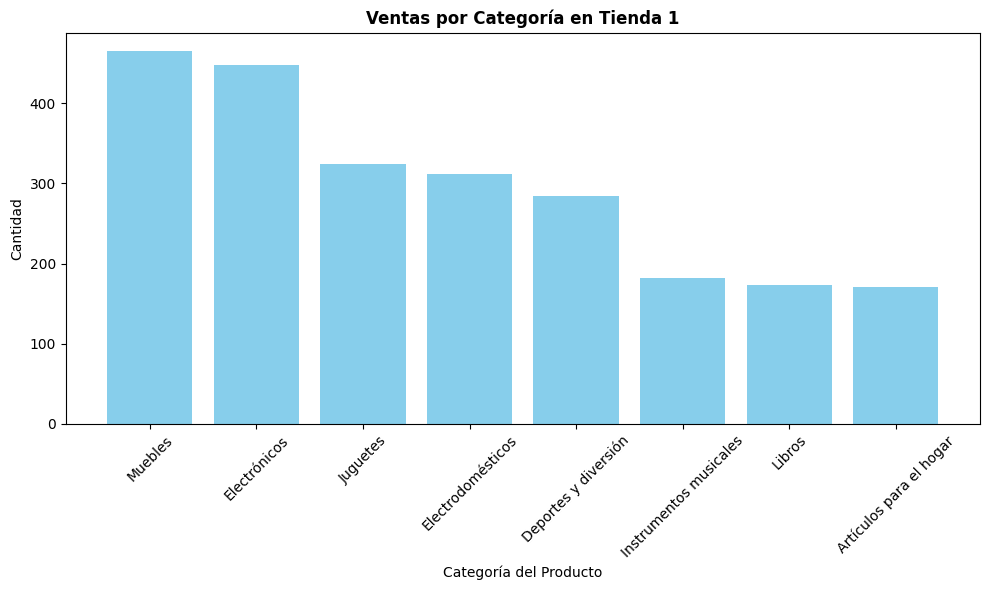

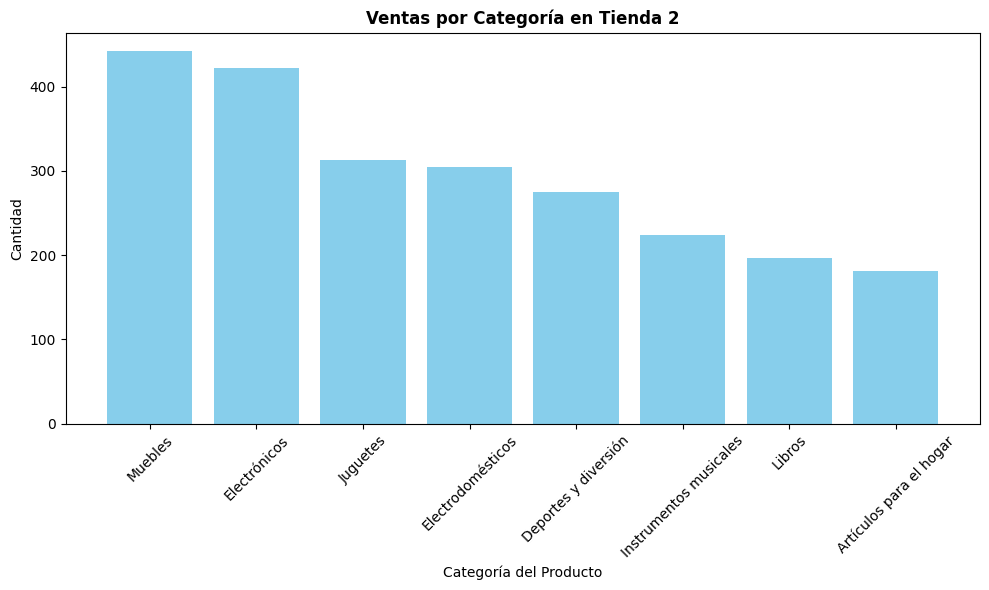

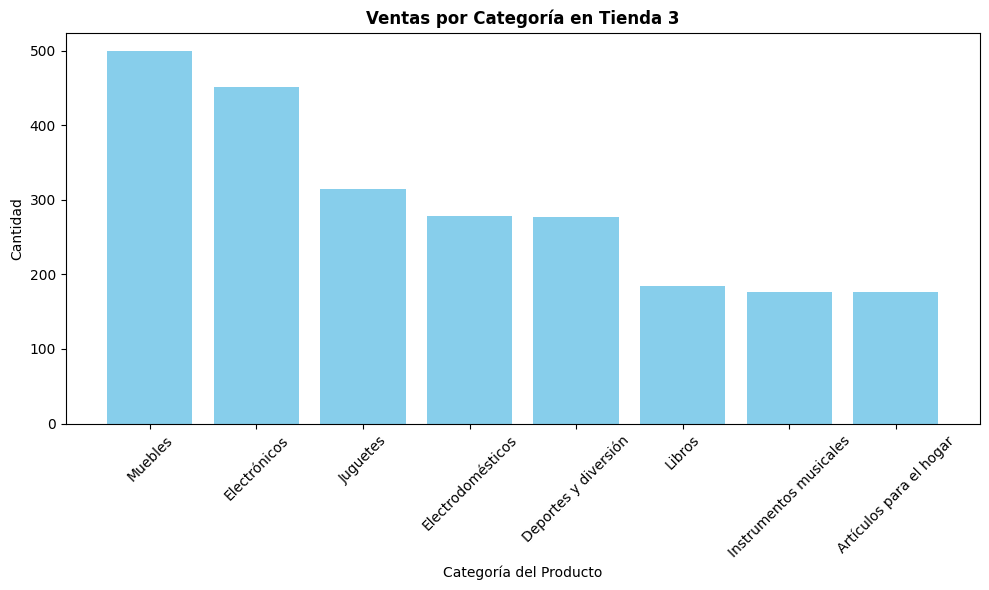

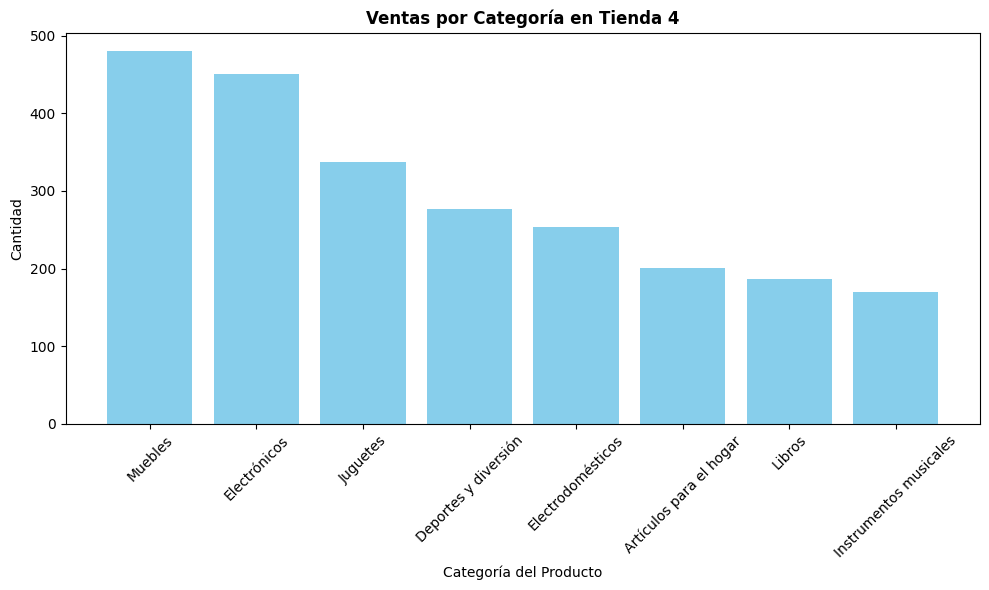

In [15]:
# Barras
graficas_por_categoria(categorias_tienda1, "Tienda 1", tipo="barra")
graficas_por_categoria(categorias_tienda2, "Tienda 2", tipo="barra")
graficas_por_categoria(categorias_tienda3, "Tienda 3", tipo="barra")
graficas_por_categoria(categorias_tienda4, "Tienda 4", tipo="barra")

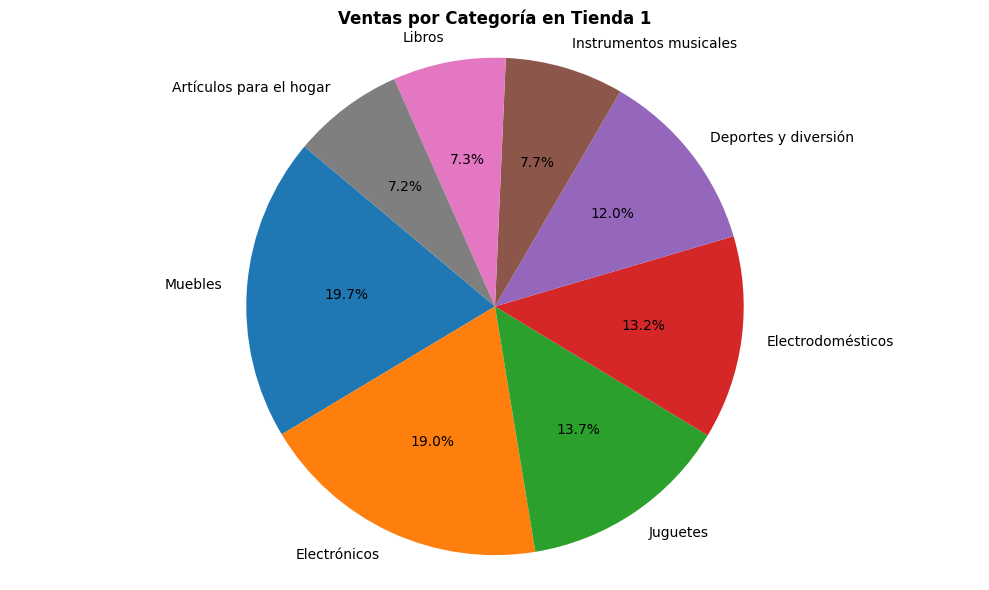

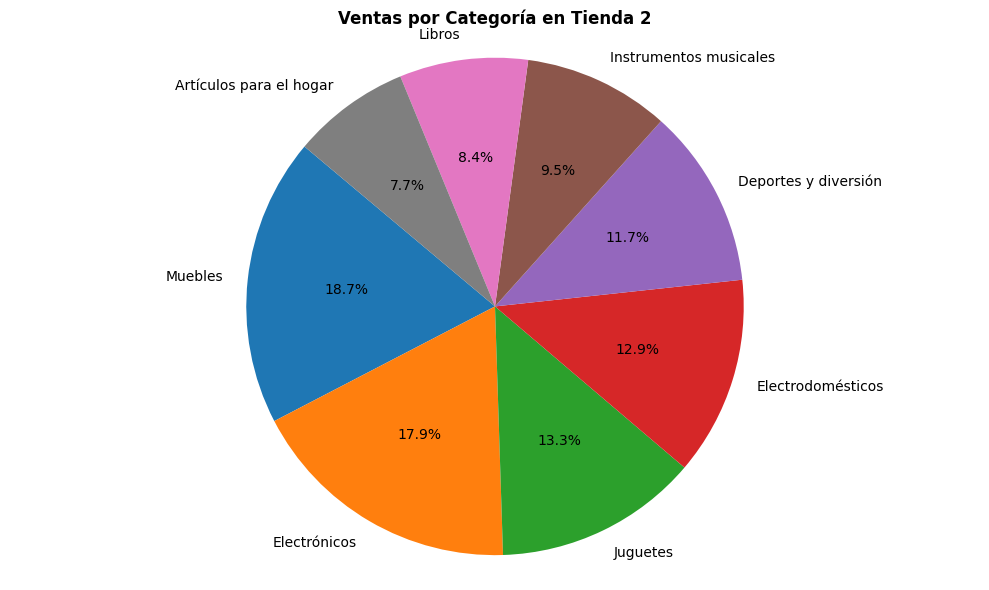

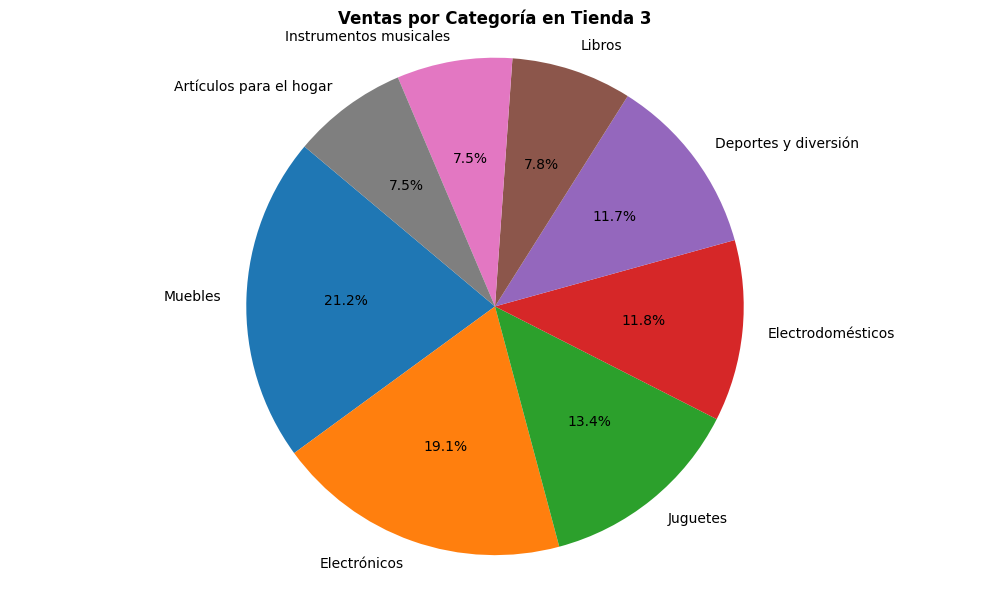

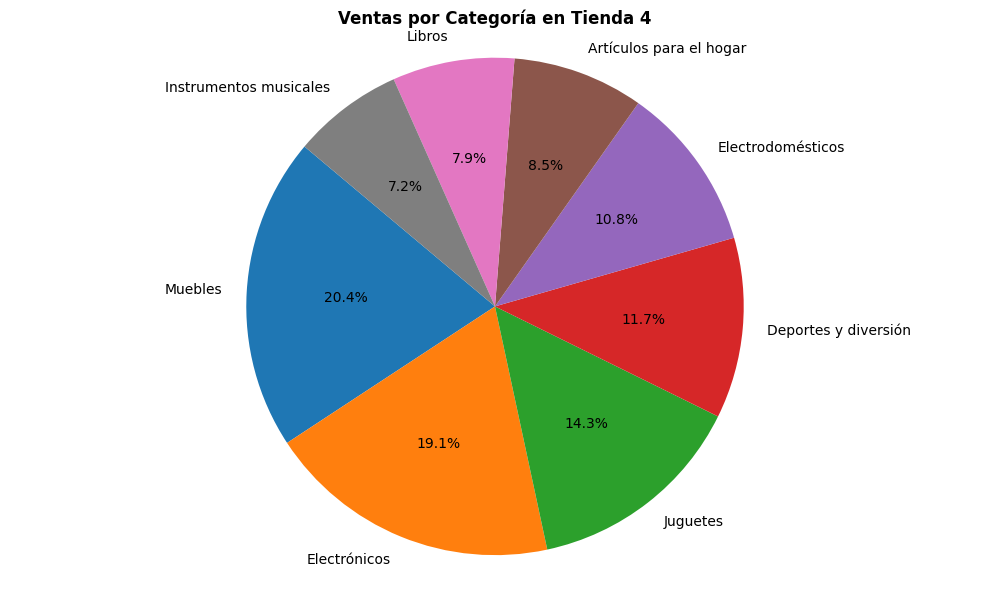

In [16]:
# Pastel
graficas_por_categoria(categorias_tienda1, "Tienda 1", tipo="pastel")
graficas_por_categoria(categorias_tienda2, "Tienda 2", tipo="pastel")
graficas_por_categoria(categorias_tienda3, "Tienda 3", tipo="pastel")
graficas_por_categoria(categorias_tienda4, "Tienda 4", tipo="pastel")

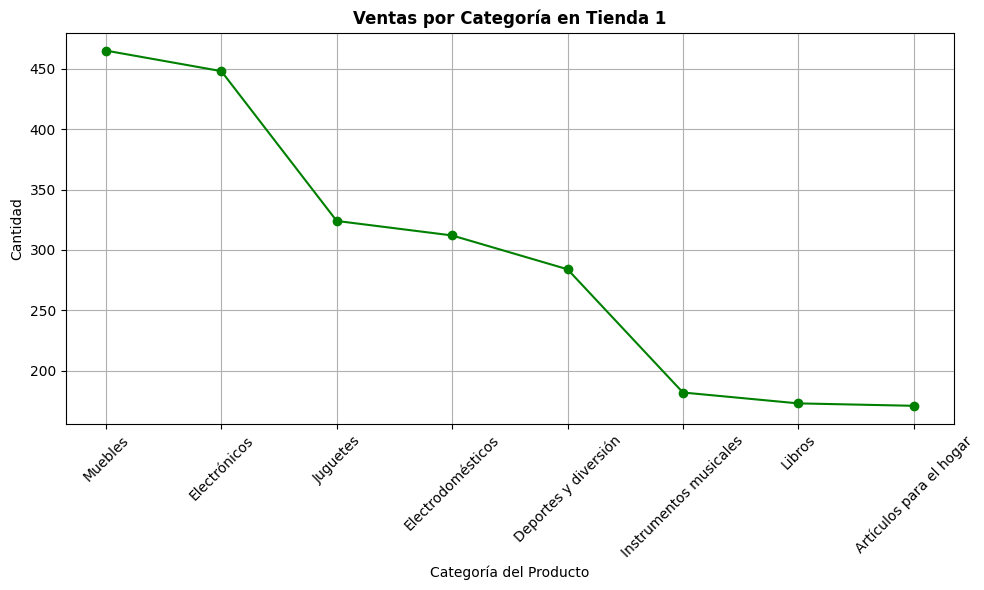

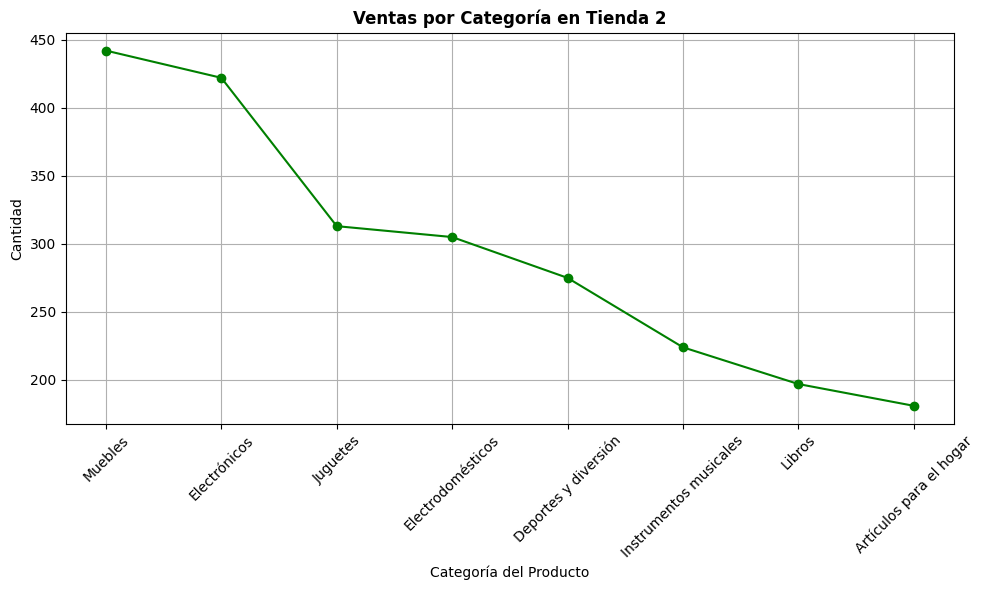

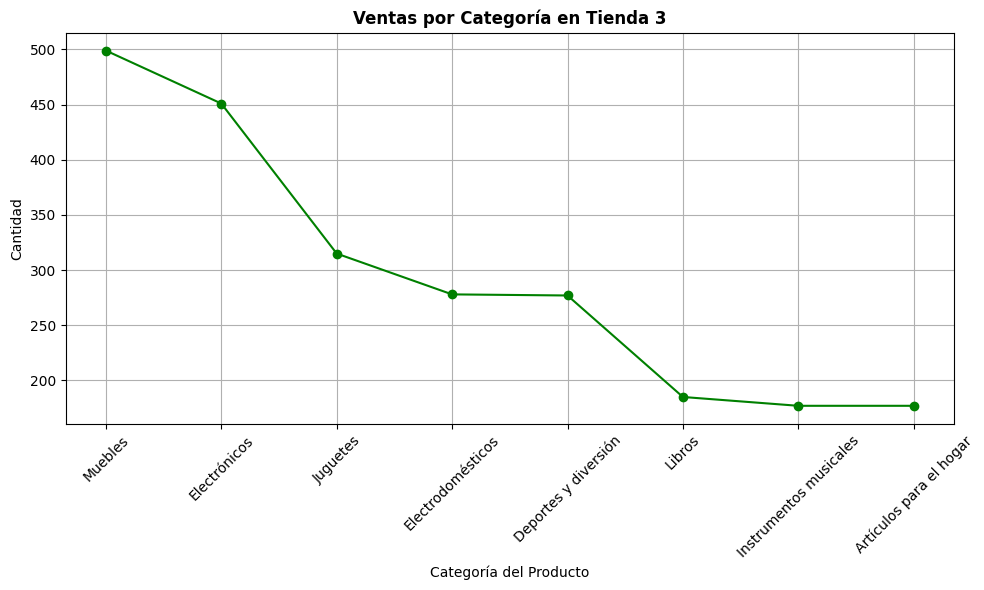

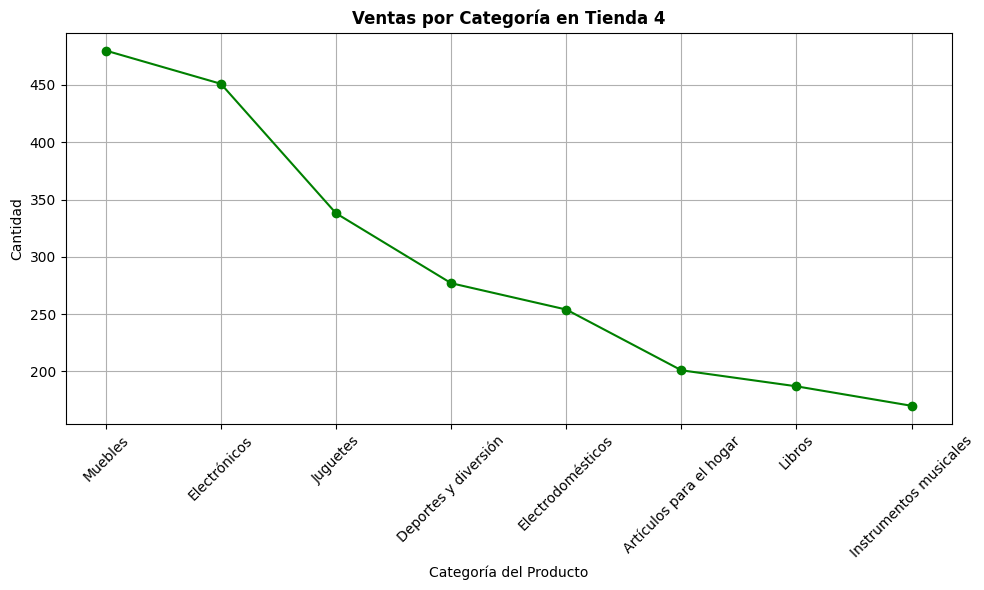

In [17]:
# Línea
graficas_por_categoria(categorias_tienda1, "Tienda 1", tipo="linea")
graficas_por_categoria(categorias_tienda2, "Tienda 2", tipo="linea")
graficas_por_categoria(categorias_tienda3, "Tienda 3", tipo="linea")
graficas_por_categoria(categorias_tienda4, "Tienda 4", tipo="linea")

# 3. Calificación promedio de la tienda


In [18]:
calificacion_tienda1 = tienda["Calificación"].mean()
calificacion_tienda2 = tienda2["Calificación"].mean()
calificacion_tienda3 = tienda3["Calificación"].mean()
calificacion_tienda4 = tienda4["Calificación"].mean()

print(f"Calificación promedio Tienda 1: {calificacion_tienda1:.2f}")
print(f"Calificación promedio Tienda 2: {calificacion_tienda2:.2f}")
print(f"Calificación promedio Tienda 3: {calificacion_tienda3:.2f}")
print(f"Calificación promedio Tienda 4: {calificacion_tienda4:.2f}")

Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


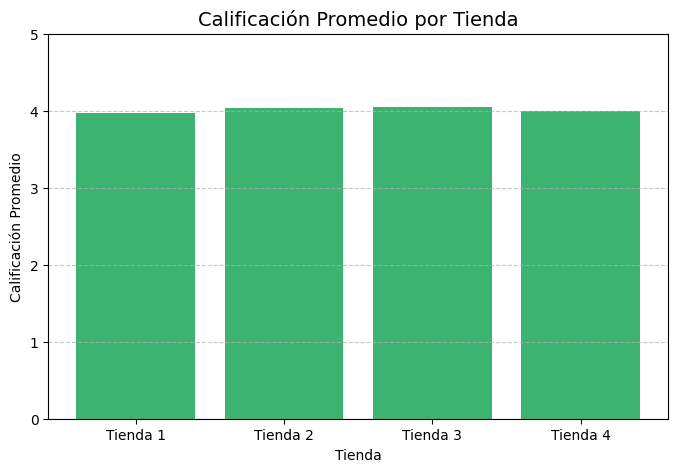

In [19]:
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
calificaciones = [
    calificacion_tienda1,
    calificacion_tienda2,
    calificacion_tienda3,
    calificacion_tienda4
]

plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, calificaciones, color='mediumseagreen')
plt.title("Calificación Promedio por Tienda", fontsize=14)
plt.xlabel("Tienda")
plt.ylabel("Calificación Promedio")
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

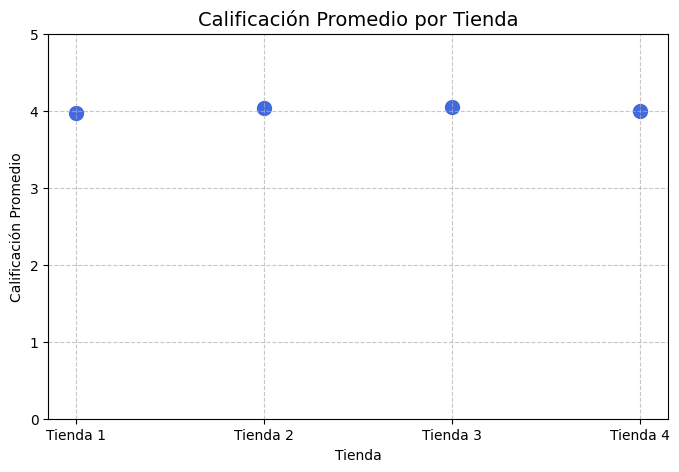

In [20]:
plt.figure(figsize=(8, 5))
plt.scatter(nombres_tiendas, calificaciones, color='royalblue', s=100)
plt.title("Calificación Promedio por Tienda", fontsize=14)
plt.xlabel("Tienda")
plt.ylabel("Calificación Promedio")
plt.ylim(0, 5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

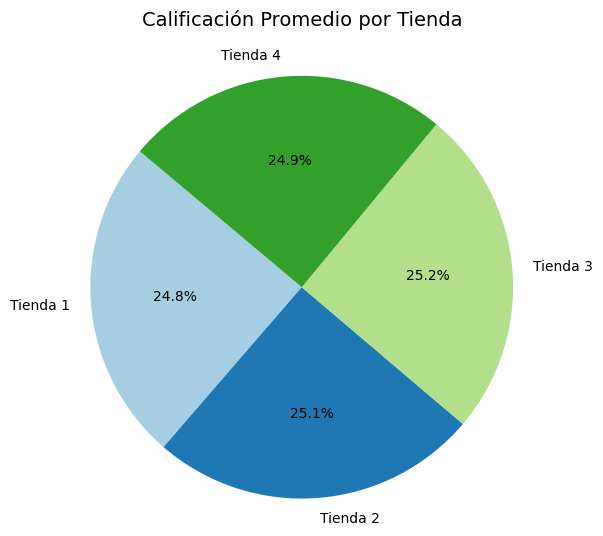

In [21]:
plt.figure(figsize=(6, 6))
plt.pie(calificaciones, labels=nombres_tiendas, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Calificación Promedio por Tienda\n", fontsize=14)
plt.axis('equal')
plt.show()


# 4. Productos más y menos vendidos

Tienda 1
Más vendido: Microondas (60 ventas)
Menos vendido: Auriculares con micrófono (33 venta(s))



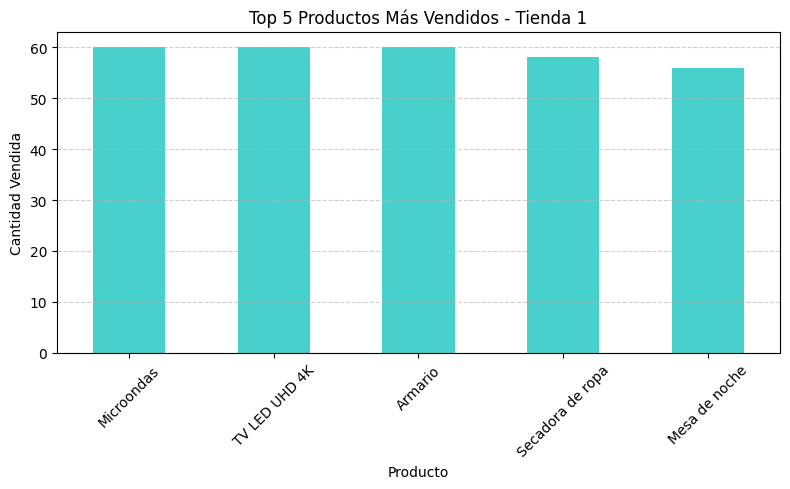

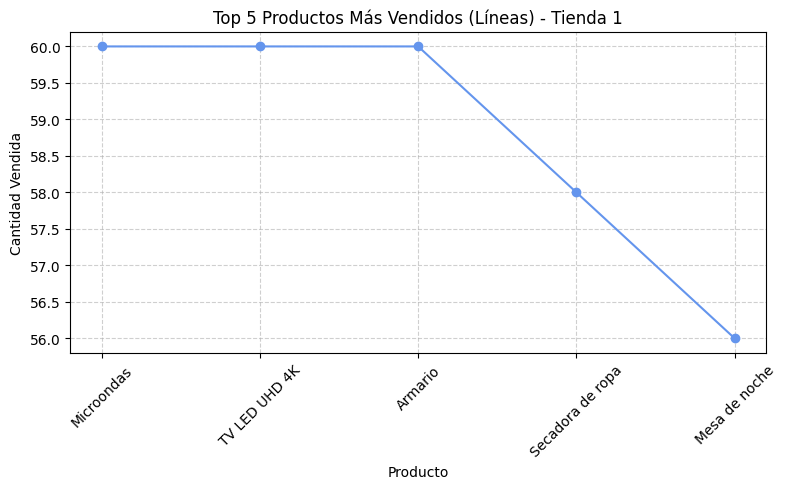

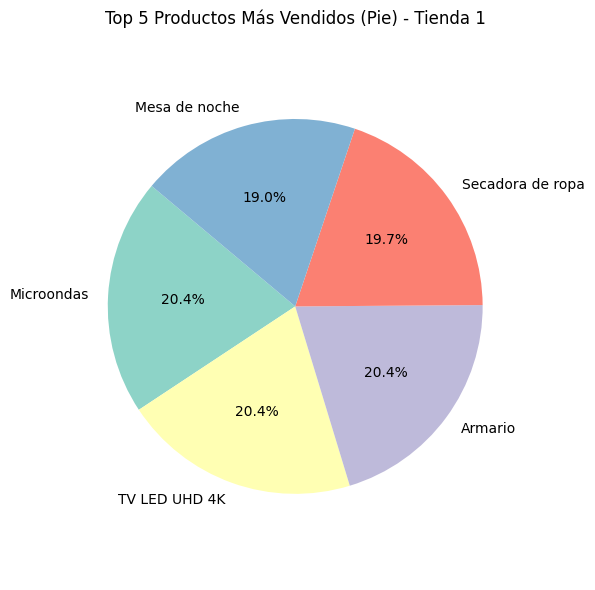



Tienda 2
Más vendido: Iniciando en programación (65 ventas)
Menos vendido: Juego de mesa (32 venta(s))



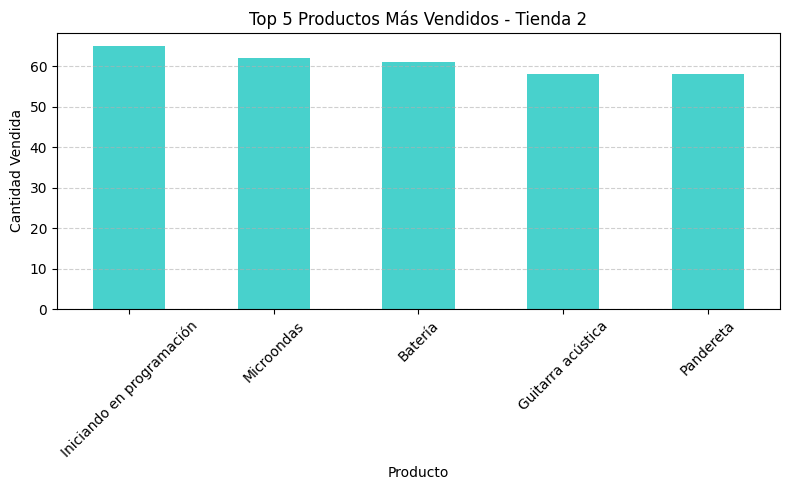

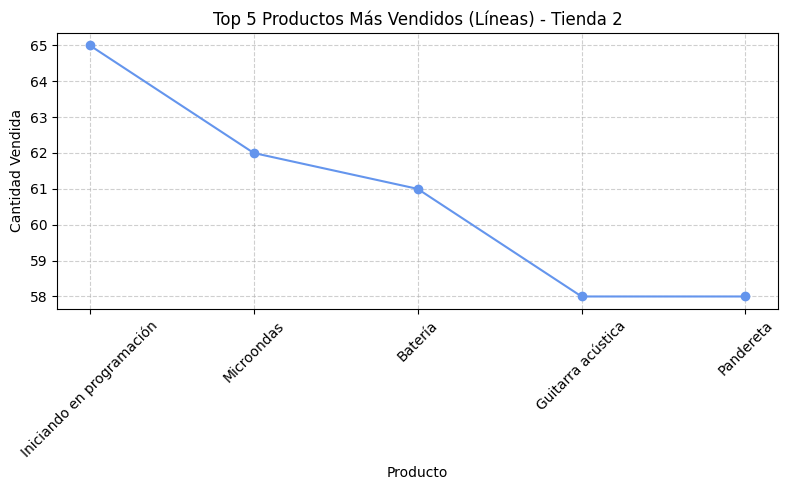

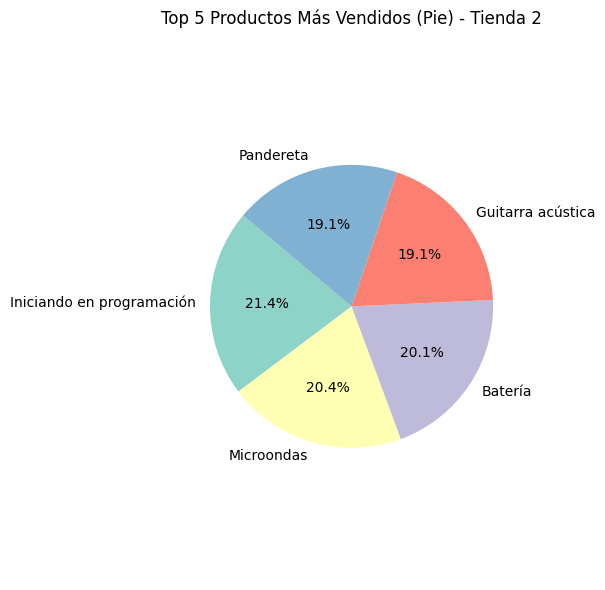



Tienda 3
Más vendido: Kit de bancas (57 ventas)
Menos vendido: Bloques de construcción (35 venta(s))



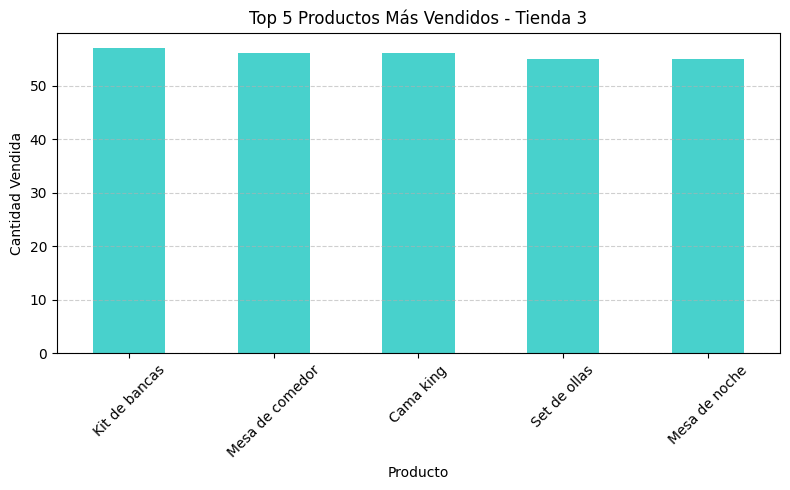

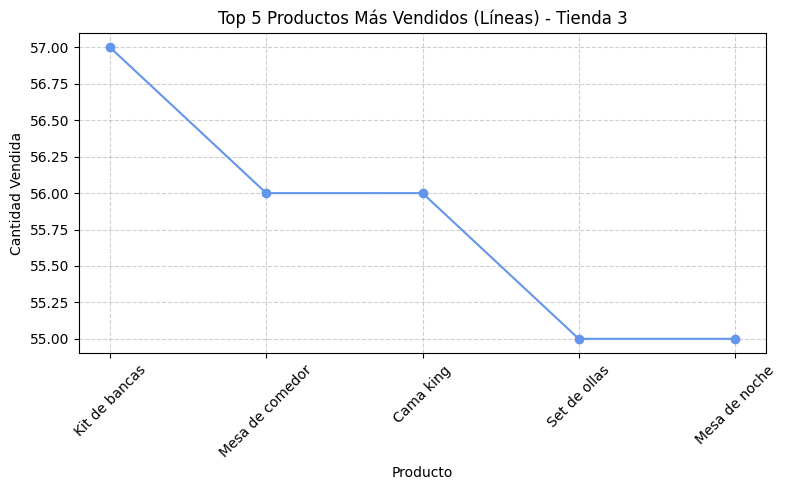

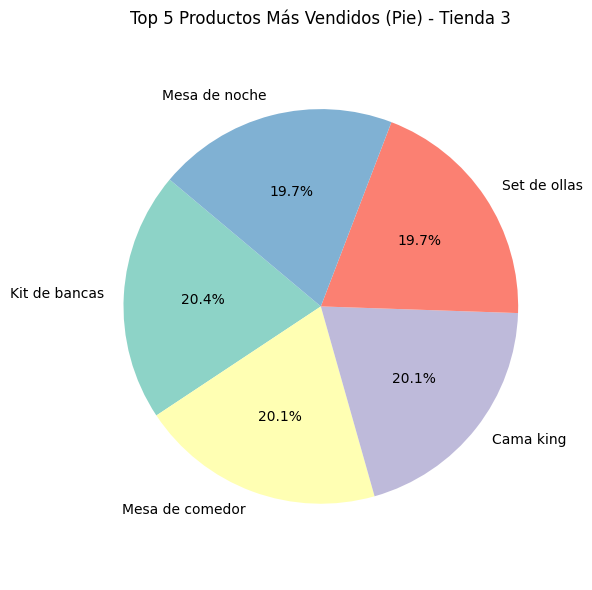



Tienda 4
Más vendido: Cama box (62 ventas)
Menos vendido: Guitarra eléctrica (33 venta(s))



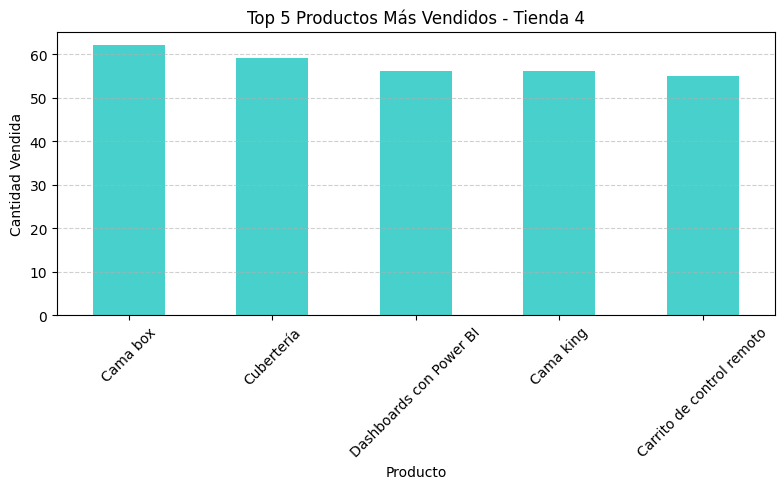

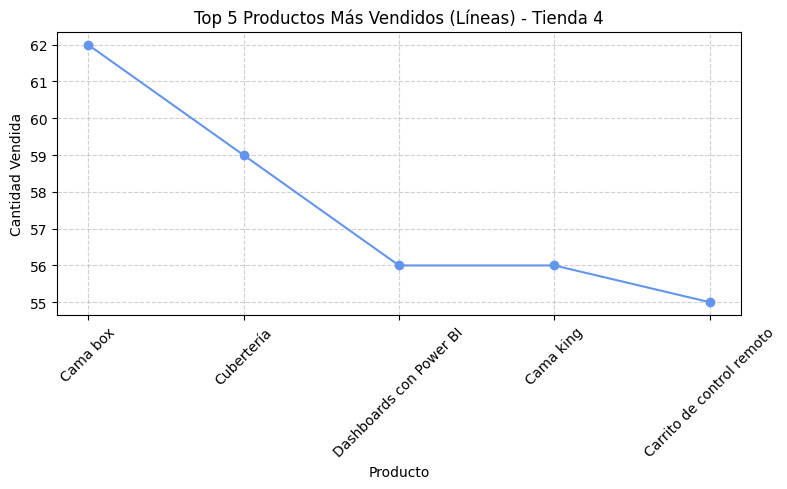

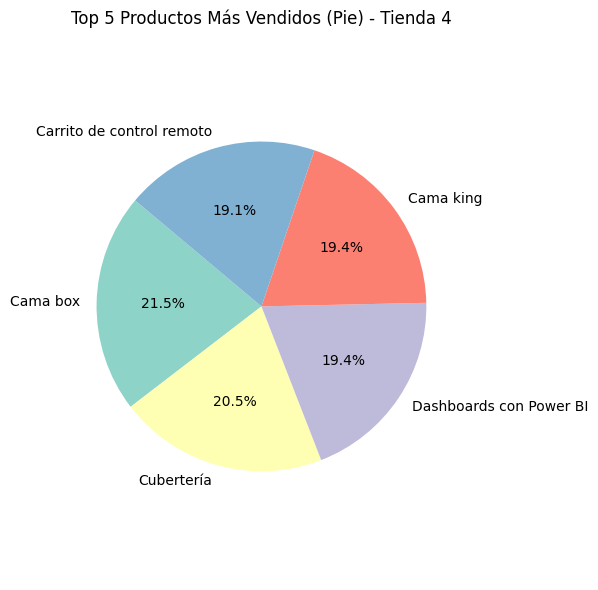

In [22]:
dict_tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

# Función para recorrer todos los productos por tienda
for nombre, df in dict_tiendas.items():
    # Asegurarse de que la columna exista
    if "Producto" not in df.columns:
        print(f"{nombre} no tiene la columna 'Producto'")
        continue

    # Contar las ventas por producto
    ventas = df["Producto"].value_counts()

    # Obtener más y menos vendido
    producto_mas = ventas.idxmax()
    cantidad_mas = ventas.max()
    producto_menos = ventas.idxmin()
    cantidad_menos = ventas.min()

    print(f"{nombre}")
    print(f"Más vendido: {producto_mas} ({cantidad_mas} ventas)")
    print(f"Menos vendido: {producto_menos} ({cantidad_menos} venta(s))\n")

    # Graficar el top 5
    top5 = ventas.head(5)
    plt.figure(figsize=(8, 5))
    top5.plot(kind="bar", color="mediumturquoise")
    plt.title(f"Top 5 Productos Más Vendidos - {nombre}")
    plt.xlabel("Producto")
    plt.ylabel("Cantidad Vendida")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()
    print("\n")

     # Gráfico de líneas
    plt.figure(figsize=(8, 5))
    plt.plot(top5.index, top5.values, marker='o', linestyle='-', color='cornflowerblue')
    plt.title(f"Top 5 Productos Más Vendidos (Líneas) - {nombre}")
    plt.xlabel("Producto")
    plt.ylabel("Cantidad Vendida")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("\n")

     # Gráfico de pastel
    plt.figure(figsize=(6, 6))
    plt.pie(top5.values, labels=top5.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
    plt.title(f"Top 5 Productos Más Vendidos (Pie) - {nombre}")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    print("\n")


# 5. Envío promedio por tienda

In [24]:
costo_envio_promedio = {}

for nombre, df in dict_tiendas.items():
    promedio = df["Costo de envío"].mean()
    costo_envio_promedio[nombre] = promedio
    print(f"{nombre}: Costo de envío promedio = ${promedio:.2f}")

Tienda 1: Costo de envío promedio = $26018.61
Tienda 2: Costo de envío promedio = $25216.24
Tienda 3: Costo de envío promedio = $24805.68
Tienda 4: Costo de envío promedio = $23459.46


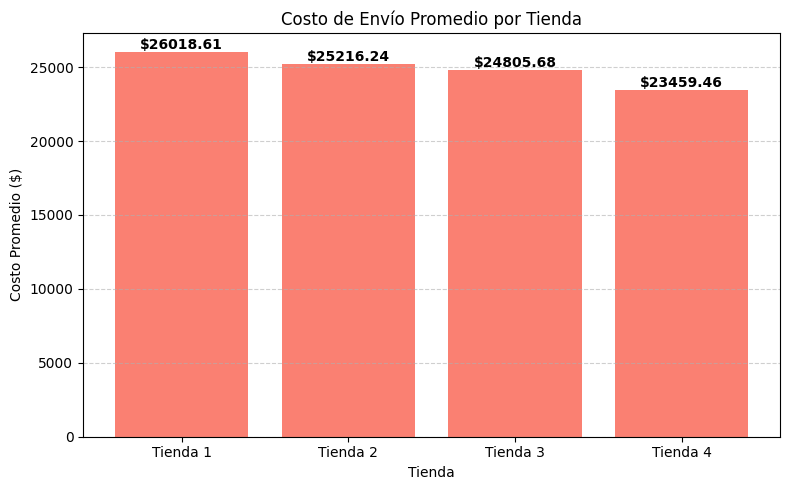

In [25]:
# Graficar los costos promedio
plt.figure(figsize=(8, 5))

nombres_tiendas = list(costo_envio_promedio.keys())
valores = list(costo_envio_promedio.values())
barras = plt.bar(nombres_tiendas, valores, color='salmon')

for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width()/2,
        altura + 0.5,
        f"${altura:.2f}",
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.title("Costo de Envío Promedio por Tienda")
plt.ylabel("Costo Promedio ($)")
plt.xlabel("Tienda")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

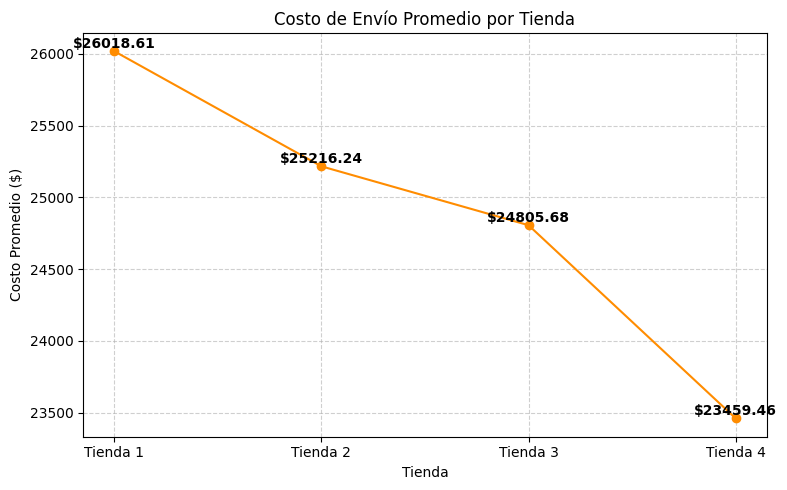

In [26]:
# Gráfico de líneas
plt.figure(figsize=(8, 5))
plt.plot(nombres_tiendas, valores, marker='o', linestyle='-', color='darkorange')
plt.title("Costo de Envío Promedio por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo Promedio ($)")
plt.grid(True, linestyle='--', alpha=0.6)

for i, valor in enumerate(valores):
    plt.text(i, valor + 0.5, f"${valor:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

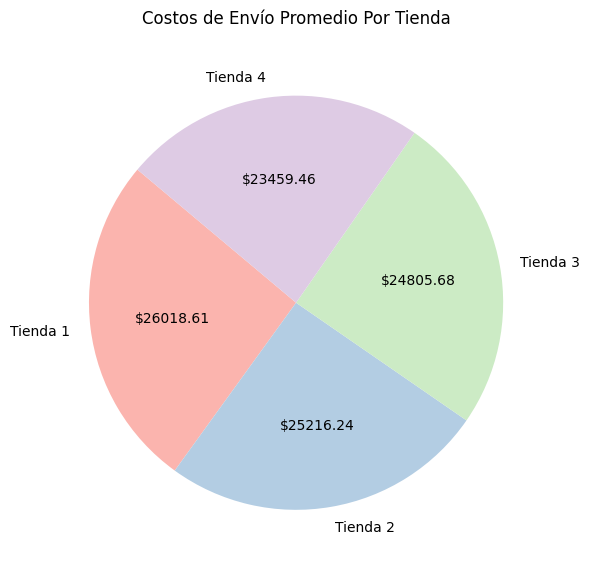

In [27]:
# Gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(valores, labels=nombres_tiendas, autopct=lambda p: f"${(p/100)*sum(valores):.2f}", startangle=140, colors=plt.cm.Pastel1.colors)
plt.title("Costos de Envío Promedio Por Tienda")
plt.axis('equal')
plt.tight_layout()
plt.show()

# **Informe Final - Análisis de Tiendas**

## **Introducción**

El propósito de este análisis es ayudar al Sr. Juan a decidir en qué tienda debería vender sus productos. Para tomar una decisión informada, se han evaluado diversos factores clave que influyen directamente en el rendimiento de cada tienda:

- Ingresos totales generados  
- Categorías de productos más y menos vendidas  
- Calificaciones promedio de los clientes  
- Productos más y menos vendidos  
- Costo de envío promedio  

A través de gráficos y estadísticas, hemos comparado el desempeño de las tiendas disponibles para identificar la que ofrece el mejor entorno para sus ventas.

---

## **Conclusión y Recomendación**

Después de considerar todos los factores evaluados, la mejor opción para que el Sr. Juan venda sus productos es **Tienda 1**. Esta recomendación se basa en las siguientes fortalezas:

- **Mayor ingreso total**, lo cual refleja un mercado activo y un alto potencial de ventas.  
- **Buena distribución en ventas por categoría**, lo cual permite una mayor exposición de diversos productos.  
- **Producto más vendido con buena rotación (60 unidades)**, que confirma la demanda.

Si bien **Tienda 3** tiene la mejor calificación promedio, y **Tienda 4** cuenta con el menor coste de envío, estos factores no compensan el hecho de que ambas tiendas presentan menores ingresos y una rotación ligeramente más baja en productos clave. Además, **Tienda 1** mantiene una calificación aceptable (**3.98**), dentro de un margen competitivo.

---

### ✅ **Recomendación final**  
El Sr. Juan debería vender en **Tienda 1**, donde encontrará:

- El mayor volumen de ventas  
- Una demanda amplia en varias categorías  
- Un historial financiero sólido  
